# Setup

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [40]:
data = pd.read_csv('DBSCAN_Data.csv')
data

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [41]:
X = np.array(data.Weight)
Y = np.array(data.Height)

# Plotting the given data

[]

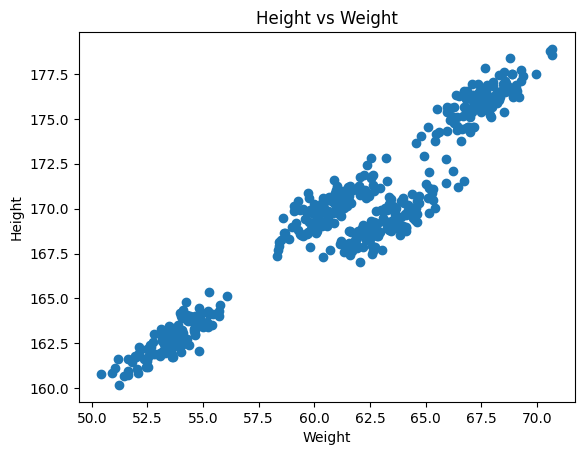

In [42]:
plt.scatter(X, Y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")
plt.plot()

# Point Class

In [43]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.isCore = False
        self.index = 0
        self.id = 0
        self.Neighbours = list()
    
    def __repr__(self):
        return f"({self.x}, {self.y})"

Function to compute the Euclidean distance

In [44]:
def Distance(p1, p2):
    return np.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)

Creating a list of Points

In [45]:
Points = []
for i in range(len(X)):
    Points.append(Point(X[i], Y[i]))
    Points[i].index = i

# Hyperparameters

In [46]:
eps = 0.6
minPoints = 5

# Creating core and non core points

In [47]:
for p1 in Points:
    for p2 in Points:
        if Distance(p1, p2) < eps and p1.index != p2.index:
            p1.Neighbours.append(p2.index)
    
    if(len(p1.Neighbours) > minPoints):
        p1.isCore = True

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


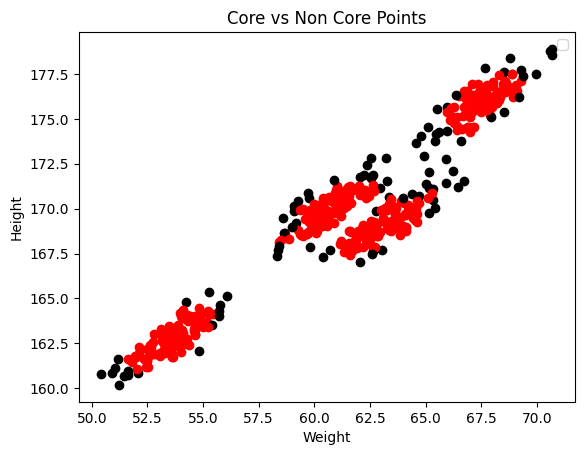

In [48]:
for point in Points:
    if point.isCore == True:
        plt.scatter(point.x, point.y, color = "red")
    else:
        plt.scatter(point.x, point.y, color = "black")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Core vs Non Core Points")
plt.legend()
plt.show()

# Clustering over all points

In [49]:
def cluster(P, id):
    P.id = id
    for n in P.Neighbours:
        # Core points spread the cluster further in Density Based Clustering
        if Points[n].isCore == True and Points[n].id == 0:
            cluster(Points[n], id)

        # Non Core points can join the cluster, not spread it further
        if Points[n].isCore == False and Points[n].id == 0:
            Points[n].id = id

In [50]:
count = 1
for point in Points:
    if point.id == 0 and point.isCore == True:
        cluster(point, count)
        count += 1

In [51]:
count # No. of clusters

5

# Final Visualization

In [56]:
hexadecimal_alphabets = '0123456789ABCDEF'
color = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(count)]
color[0] = "black"

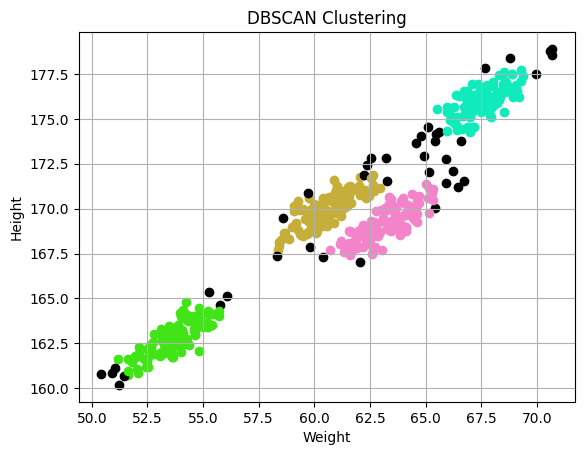

In [57]:
for point in Points:
    plt.scatter(point.x, point.y, color = color[point.id])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()